### Deep Learning Lab -- Forward Propagate A Dataset Built With Images

In this lab you'll forward propagate using a dataset that contains digits of handwritten digits.  

Your neural network will have the following qualities to it:

 - An input layer
 - two hidden layers, one with 5 neurons, and one with 10
 - an output layer that has 10 predicted classes of outcomes

#### Step 1:  Load in the MNIST Dataset

In [33]:
from matplotlib.pyplot import imshow
import numpy as np
import pickle
from scipy.special import expit

In [3]:
with open('../assets/train_set.pickle', 'rb') as data:
    X = pickle.load(data)

In [5]:
with open('../assets/train_label.pickle', 'rb') as data:
    y = pickle.load(data)

#### Step 2:  Check the shape of your training images, and look at the first item.

In [8]:
X.shape

(60000, 28, 28)

In [10]:
X[0]

array([[  0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,
          0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,
          0,   0],
       [  0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,
          0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,
          0,   0],
       [  0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,
          0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,
          0,   0],
       [  0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,
          0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,
          0,   0],
       [  0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,
          0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,
          0,   0],
       [  0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   3,
         18,  18,  18, 126, 136, 175,  26, 166, 255, 247, 127,   0,   0,
          0,   0],
       [  

#### Step 3).  Try using the imshow() method in matplotlib to see what the image looks like

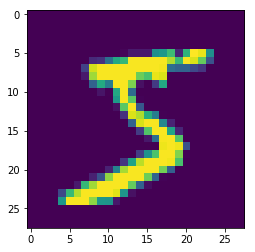

In [17]:
imshow(X[0]);

#### Try looking at a few more to see what they look like.  Also look at the training labels to see their corresponding identity.

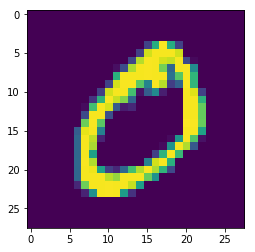

In [18]:
imshow(X[1]);

**How many unique labels are there?**

In [21]:
len(set(y))

10

#### Step 4).  To make this a little bit easier, let's just use the first 100 images of the dataset, so computation doesn't take too long.

In [22]:
# create a new variable that's the first 100 images of the training set along with their labels
Xs = X[:100]
ys = y[:100]

#### Standardize by dividing the training set by 255

In [23]:
Xs = Xs / 255

**Any idea why we'd do this instead of traditional standardization?**

#### Step 5).  Reshape your data so that it's two dimensional:  100X784

In [30]:
Xs = Xs.reshape(100,784)

#### Step 6). Initialize a hidden unit with 10 neurons

In [55]:
coef_ = np.random.normal(0, 0.1, 7840).reshape(784,10)

#### Step 7).  Use the dot() method to matrix multiply your input and hidden layer.  Apply the Relu activation function afterwards.

In [56]:
preds = Xs.dot(coef_)
hidden_opt = np.maximum(0, preds)
hidden_opt.shape

(100, 10)

The shape of your output should be 100 x 10.

#### Step 8:  Initialize another hidden layer with 5 neurons.

In [57]:
coef2_ = np.random.normal(0, 0.1, 50).reshape(10,5)

#### Step 9:  Matrix multiply the output from your last layer, and activate it with ReLu.

In [58]:
pred2 = hidden_opt.dot(coef2_)
hidden_opt2 = np.maximum(0, pred2)
hidden_opt2.shape

(100, 5)

#### Step 10:  Create Your Output Layer With 10 Predicted Answers

In [59]:
output_coef_ = np.random.normal(0, 0.1, 50).reshape(5, 10)

#### Step 11:  Matrix multiply your last hidden layer with your hidden layer, and apply the sigmoid function

In [60]:
final_output = hidden_opt2.dot(output_coef_)
predict_proba = expit(final_output)

In [65]:
predict_proba[:5]

array([[0.49843735, 0.50084126, 0.4951112 , 0.50204266, 0.4994197 ,
        0.5004124 , 0.49720482, 0.49381953, 0.49932598, 0.49565578],
       [0.49698851, 0.50537515, 0.4892696 , 0.50711356, 0.49840241,
        0.49808741, 0.48973464, 0.48187903, 0.49954224, 0.5037716 ],
       [0.49712439, 0.49708051, 0.4940155 , 0.50346764, 0.50227568,
        0.50048633, 0.50660749, 0.49591487, 0.49625121, 0.47965328],
       [0.49610783, 0.49967109, 0.49384079, 0.50351477, 0.50023846,
        0.49962311, 0.49929739, 0.49364054, 0.49876826, 0.48593551],
       [0.49630185, 0.49531785, 0.49196003, 0.50682798, 0.50513305,
        0.49929818, 0.5150549 , 0.494484  , 0.49307584, 0.46983161]])

#### Step 12:  Create your prediction by choosing the column in your output layer with the highest overall value.

In [61]:
final_predictions = np.argmax(predict_proba, axis = 1)

In [62]:
final_predictions

array([3, 3, 6, 3, 6, 6, 5, 3, 6, 5, 9, 3, 6, 5, 5, 3, 3, 9, 6, 5, 6, 3,
       3, 3, 6, 3, 6, 3, 3, 3, 3, 9, 5, 5, 3, 3, 3, 3, 3, 6, 3, 9, 6, 9,
       6, 3, 3, 3, 6, 3, 3, 3, 3, 3, 3, 3, 3, 3, 6, 3, 3, 6, 3, 3, 3, 3,
       3, 9, 3, 3, 3, 3, 5, 5, 6, 3, 3, 3, 5, 5, 3, 3, 3, 5, 3, 6, 6, 3,
       3, 5, 3, 3, 6, 5, 3, 3, 3, 3, 3, 3])

In [63]:
ys[final_predictions]

array([1, 1, 1, 1, 1, 1, 2, 1, 1, 2, 4, 1, 1, 2, 2, 1, 1, 4, 1, 2, 1, 1,
       1, 1, 1, 1, 1, 1, 1, 1, 1, 4, 2, 2, 1, 1, 1, 1, 1, 1, 1, 4, 1, 4,
       1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1,
       1, 4, 1, 1, 1, 1, 2, 2, 1, 1, 1, 1, 2, 2, 1, 1, 1, 2, 1, 1, 1, 1,
       1, 2, 1, 1, 1, 2, 1, 1, 1, 1, 1, 1], dtype=uint8)